<h1>Monthly Foreclosures Prediction <br>
Using Decision Tree Regression</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

<h2> Read data set, assign features and split into X and y </h2>

In [2]:
df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)

In [3]:
df['mnth_sin'] = df['DATE'].apply(lambda x: np.sin((int(x[5:7])-1)*(2.*np.pi/12)))
df['mnth_cos'] = df['DATE'].apply(lambda x: np.cos((int(x[5:7])-1)*(2.*np.pi/12)))
df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels =['DATE_DELTA','mnth_cos', 'mnth_sin', 'CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index', 'CPI STICKY','MORT30US']
X = df[feature_labels]
y = df[['FORECLOSURE']]

print(X.shape)
print(y.shape)

df

(105, 12)
(105, 1)


,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY,mnth_sin,mnth_cos,DATE_DELTA
0,2014-01-01,1388,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814,0.000000e+00,1.000000e+00,0.0
1,2014-02-01,513,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186,5.000000e-01,8.660254e-01,31.0
2,2014-03-01,597,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857,8.660254e-01,5.000000e-01,59.0
3,2014-04-01,317,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161,1.000000e+00,6.123234e-17,90.0
4,2014-05-01,488,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235,8.660254e-01,-5.000000e-01,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,166,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575,8.660254e-01,-5.000000e-01,3042.0
101,2022-06-01,181,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963,5.000000e-01,-8.660254e-01,3073.0
102,2022-07-01,140,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465,1.224647e-16,-1.000000e+00,3103.0
103,2022-08-01,202,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544,-5.000000e-01,-8.660254e-01,3134.0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print(X_test.shape)
print(y_test.shape)

(27, 12)
(27, 1)


<h2>Plot results</h2>

In [63]:
regressor = DecisionTreeRegressor(max_depth=13, random_state=10)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
y_pred
r2_score(y_test,y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(r2_score(y_test,y_pred), rmse)

0.4301411106260826 440.5199322386996


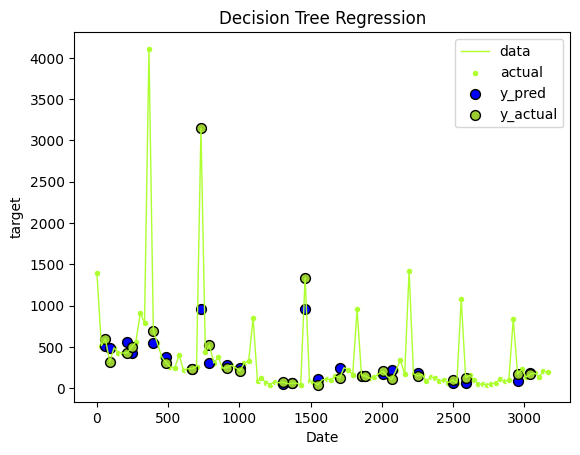

In [56]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure()
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
plt.scatter(X_test['DATE_DELTA'], y_test, s=50, edgecolor="black", c="yellowgreen", label="y_actual")

plt.xlabel("Date")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [74]:
import matplotlib.pyplot as plt
avg_rmse = 0
avg_r2 = 0
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=i)
    regressor = DecisionTreeRegressor(max_depth=13, random_state=10)
    #regressor = DecisionTreeRegressor(max_depth=12, random_state=1, min_weight_fraction_leaf=0.01)#, criterion=i)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    y_pred
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"R_2: {r2_score(y_test,y_pred)}, RMSE {rmse} i {i}")
    avg_rmse += rmse
    avg_r2 += abs(r2_score(y_test,y_pred))
    print(abs(r2_score(y_test,y_pred)))
print(f"R_2 avg: {avg_r2 / i}, RMSE {avg_rmse / (i+1)} i {i}")


R_2: 0.4698058236349364, RMSE 453.45473864543527 i 0
0.4698058236349364
R_2: 0.8582010546647864, RMSE 92.12187579505749 i 1
0.8582010546647864
R_2: 0.41734429047791377, RMSE 485.62771749561415 i 2
0.41734429047791377
R_2: 0.43519798413160593, RMSE 112.14153755163358 i 3
0.43519798413160593
R_2: 0.4270114922414576, RMSE 457.6799378993529 i 4
0.4270114922414576
R_2: 0.7781096116467716, RMSE 153.05554547287727 i 5
0.7781096116467716
R_2: -2.5505854118727007, RMSE 555.7755342262237 i 6
2.5505854118727007
R_2: 0.14523566533724463, RMSE 728.4758335044479 i 7
0.14523566533724463
R_2: 0.4255754094633647, RMSE 733.6830105706415 i 8
0.4255754094633647
R_2: 0.7953253809684477, RMSE 140.04856300583737 i 9
0.7953253809684477
R_2: -1.1777444042086893, RMSE 479.0373489498381 i 10
1.1777444042086893
R_2: 0.2491950234749699, RMSE 84.41480912730893 i 11
0.2491950234749699
R_2: 0.5008748867567987, RMSE 672.4048482871016 i 12
0.5008748867567987
R_2: 0.29093952144175084, RMSE 662.1917245028059 i 13
0.29093

In [ ]:
    # Plot the results
    plt.figure()
    plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
    plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
    plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
    plt.scatter(X_test['DATE_DELTA'], y_test, s=50, edgecolor="black", c="yellowgreen", label="y_actual")

    plt.xlabel("Date")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()